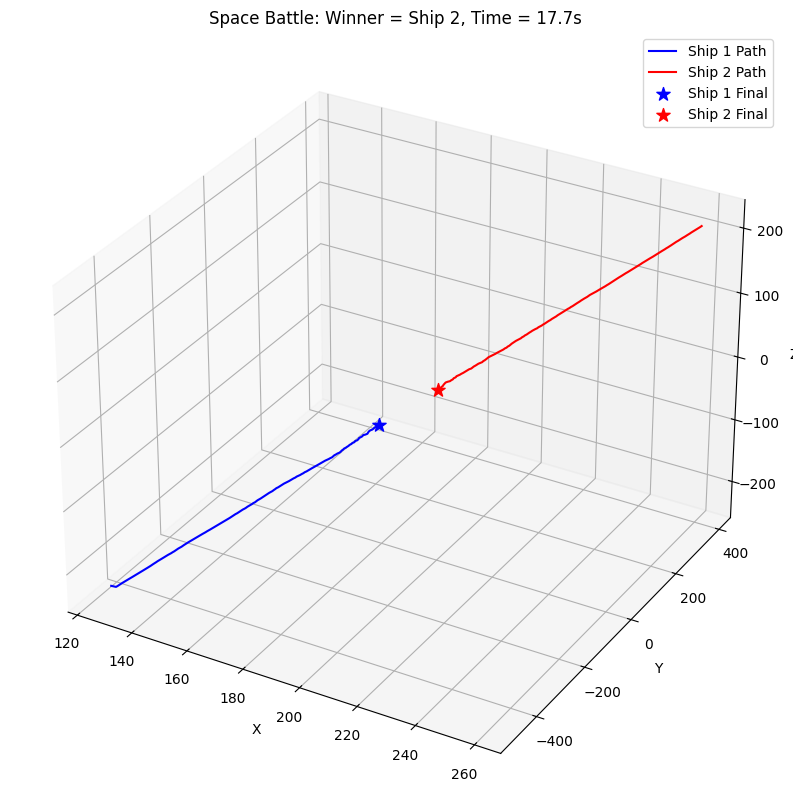

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Spaceship:
    
    def __init__(self, position, velocity, name):
        
        self.position = np.array(position, dtype=float)
        self.velocity = np.array(velocity, dtype=float)
        self.name = name
        
        self.history = [self.position.copy()]
        self.destroyed = False
        
        self.laser_range = 100.0  
        self.laser_angle = 30.0  
        self.speed = 25.0        
    
    def move(self, target, time_freq, mode='pursuit'):
        if self.destroyed:
            return
        
        prediction_time = 1.0 
        predicted_target_pos = target.position + target.velocity * prediction_time
        
        if mode == 'pursuit':
            direction = predicted_target_pos - self.position
        elif mode == 'evasion':
            direction = np.cross(target.position - self.position, np.random.uniform(-1, 1, 3))
        else:
            raise ValueError("Mode must be 'pursuit' or 'evasion'")
        
        random_offset = np.random.uniform(-15, 15, 3)
        direction += random_offset
        
        distance = np.linalg.norm(direction)
        if distance > 0:
            direction /= distance
            self.velocity = direction * self.speed
            self.position += self.velocity * time_freq
            self.history.append(self.position.copy())
    
    def can_shoot(self, target):
        if self.destroyed:
            return False
        
        direction = target.position - self.position
        distance = np.linalg.norm(direction)
        
        if distance > self.laser_range:
            return False
        
        if distance == 0:
            return True
        
        angle = np.degrees(np.arccos(np.dot(direction, self.velocity) / 
                                     (distance * np.linalg.norm(self.velocity))))
        return angle <= self.laser_angle

def run_simulation(initial_positions, time_freq=0.1, max_time=60.0):
    ship1 = Spaceship(initial_positions['ship1_pos'], 
                      initial_positions['ship1_vel'], "Ship 1")
    ship2 = Spaceship(initial_positions['ship2_pos'], 
                      initial_positions['ship2_vel'], "Ship 2")
    
    time = 0
    while time < max_time:
        ship1_mode = 'pursuit' if time % 3 != 0 else 'evasion'
        ship2_mode = 'pursuit' if time % 3 != 1 else 'evasion'
        
        ship1.move(ship2, time_freq, mode=ship1_mode)
        ship2.move(ship1, time_freq, mode=ship2_mode)
        
        if ship1.can_shoot(ship2) and ship2.can_shoot(ship1):
            winner = np.random.choice([ship1.name, ship2.name])
            return {'winner': winner, 'time': time, 'ship1': ship1, 'ship2': ship2}
        elif ship1.can_shoot(ship2):
            return {'winner': ship1.name, 'time': time, 'ship1': ship1, 'ship2': ship2}
        elif ship2.can_shoot(ship1):
            return {'winner': ship2.name, 'time': time, 'ship1': ship1, 'ship2': ship2}
        
        time += time_freq
    
    return {'winner': 'Draw', 'time': max_time, 'ship1': ship1, 'ship2': ship2}

initial_positions = {
    'ship1_pos': np.random.uniform(-500, 500, 3),
    'ship1_vel': np.random.uniform(-10, 10, 3),
    'ship2_pos': np.random.uniform(-500, 500, 3),
    'ship2_vel': np.random.uniform(-10, 10, 3)
}

result = run_simulation(initial_positions)

def visualize_result(result):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    ship1_history = np.array(result['ship1'].history)
    ship2_history = np.array(result['ship2'].history)
    
    ax.plot(ship1_history[:,0], ship1_history[:,1], ship1_history[:,2], 
            'b-', label='Ship 1 Path')
    ax.plot(ship2_history[:,0], ship2_history[:,1], ship2_history[:,2], 
            'r-', label='Ship 2 Path')
    
    ax.scatter(*result['ship1'].position, color='blue', s=100, marker='*', label='Ship 1 Final')
    ax.scatter(*result['ship2'].position, color='red', s=100, marker='*', label='Ship 2 Final')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.title(f"Space Battle: Winner = {result['winner']}, Time = {result['time']:.1f}s")
    plt.show()

    
visualize_result(result)
